In [112]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA
from numpy import linalg as LA
from tqdm import *
import math as math
import xgboost as xgb 
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA


In [113]:
df = pd.read_excel('AAPL_1DAY.xlsx')

In [114]:
#Discard rows and columns containing null values
df = df.dropna(how='any')

In [115]:
#sort by date
df = df.sort_values(by='DATE')

In [116]:
choose_factor = [i for i in df.columns if i not in ['DATE','ZSPREADTOMORROW']]

In [117]:
choose_feature = df[choose_factor]

In [118]:
choose_label = df['ZSPREADTOMORROW']

In [119]:
x_train,x_test,y_train,y_test=train_test_split(choose_feature,choose_label,test_size=0.2,random_state=1)

In [120]:
# from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [121]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train a random forest to solve regression problems
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=200)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

# Evaluate regression performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score of random forest model：\n",r2_score(y_test,y_pred))

Mean Absolute Error: 3.735272500000001
Mean Squared Error: 50.51748386156652
Root Mean Squared Error: 7.107565255526432
R^2 Score of random forest model：
 0.866457504957223


In [122]:
importances = forest.feature_importances_ 
importances_df = pd.DataFrame([choose_factor, importances], index=['Features', 'Importances']).T
importances_df.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
5,ZSPREAD,0.916838
4,YTM,0.0311933
3,CLOSE,0.0209874
2,LOW,0.0152344
0,OPEN,0.00893888
1,HIGH,0.00680836


In [123]:
plots = pd.DataFrame(y_pred,y_test).reset_index()

In [124]:
plots.columns = ['true','predict']

<AxesSubplot:>

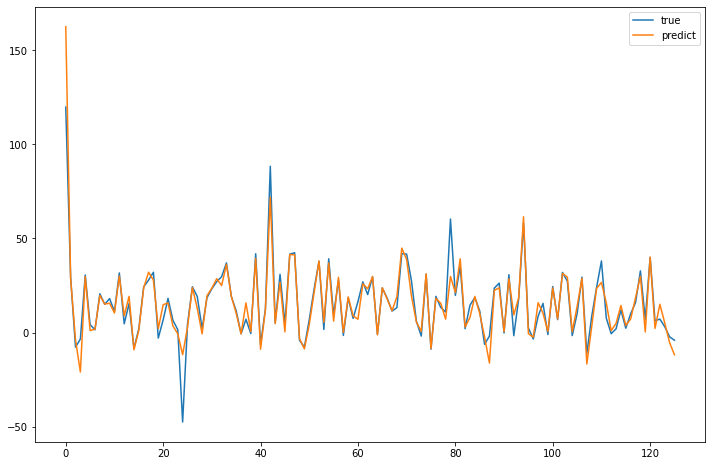

In [125]:
plots.plot(figsize=(12,8))

In [126]:
from sklearn.linear_model import LinearRegression  # 线性回归
linearmodel = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linearmodel.fit(x_train,y_train)   # 线性回归建模
predicted = linearmodel.predict(x_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R^2 Score of linear model：\n",r2_score(y_test,predicted))

Mean Absolute Error: 3.0843368843675782
Mean Squared Error: 24.01161241400367
Root Mean Squared Error: 4.900164529278958
R^2 Score of linear model：
 0.9365255276657649


<AxesSubplot:>

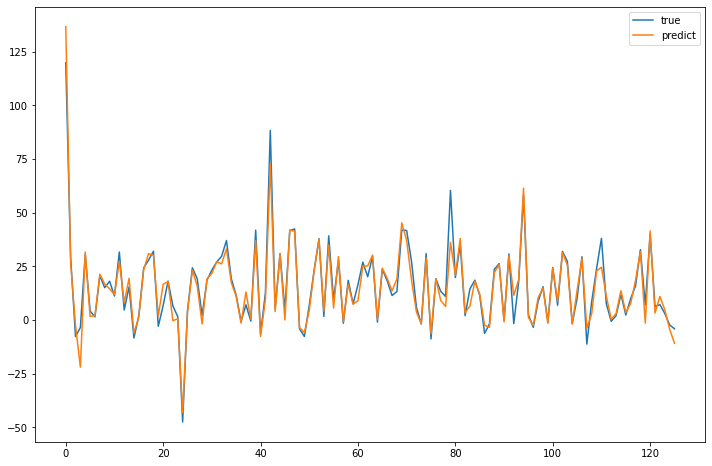

In [127]:
plots = pd.DataFrame(predicted,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))


In [128]:
from sklearn.linear_model import Ridge
ridgemodel = Ridge(alpha=10)
ridgemodel.fit(x_train,y_train)   # 岭回归建模
ridge_pred = ridgemodel.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("R^2 Score of ridge model：\n",r2_score(y_test,ridge_pred))

Mean Absolute Error: 2.935428031938688
Mean Squared Error: 24.773403906280997
Root Mean Squared Error: 4.977288810816687
R^2 Score of ridge model：
 0.9345117389968786


<AxesSubplot:>

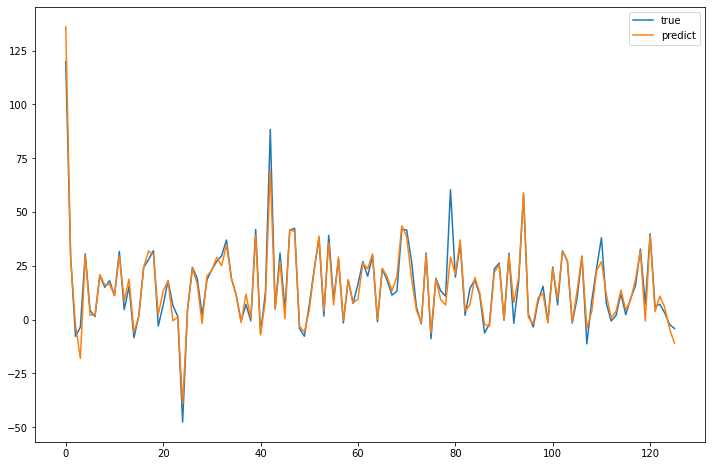

In [129]:
plots = pd.DataFrame(ridge_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [130]:
from sklearn import neighbors
KNN_model = neighbors.KNeighborsRegressor()
KNN_model.fit(x_train,y_train)
KNN_pred = KNN_model.predict(x_test)

print('Mean Absolute Error of KNN_model:', metrics.mean_absolute_error(y_test, KNN_pred))
print('Mean Squared Error of KNN_model:', metrics.mean_squared_error(y_test, KNN_pred))
print('Root Mean Squared Error of KNN_model:',np.sqrt(metrics.mean_squared_error(y_test, KNN_pred)))
print("R^2 Score of KNN model：",r2_score(y_test,KNN_pred))

Mean Absolute Error of KNN_model: 3.5686047619047625
Mean Squared Error of KNN_model: 47.3858159736508
Root Mean Squared Error of KNN_model: 6.883735611835394
R^2 Score of KNN model： 0.8747360396630217


<AxesSubplot:>

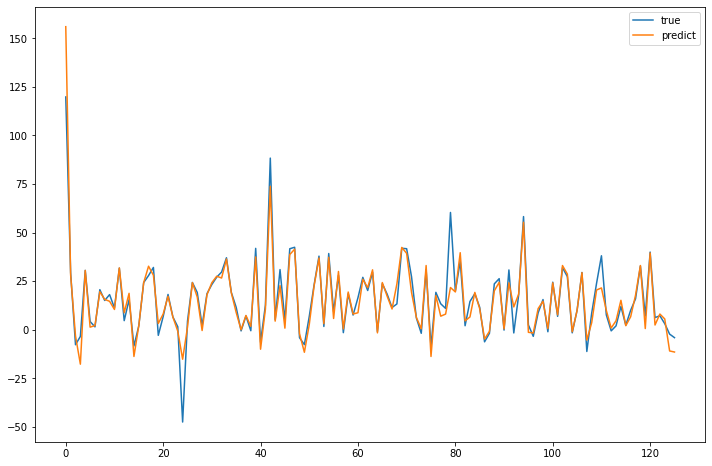

In [131]:
plots = pd.DataFrame(KNN_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [132]:
from sklearn.svm import SVR
#线性核函数 Linear kernel function
lin_svr = SVR(kernel='linear')
lin_svr.fit(x_train,y_train)
lin_svr_pred=lin_svr.predict(x_test)
print('Mean Absolute Error of lin_svr:', metrics.mean_absolute_error(y_test, lin_svr_pred))
print('Mean Squared Error of lin_svr:', metrics.mean_squared_error(y_test, lin_svr_pred))
print('Root Mean Squared Error of lin_svr:',np.sqrt(metrics.mean_squared_error(y_test, lin_svr_pred)))
print("R^2 Score of lin_svr：\n",r2_score(y_test,lin_svr_pred))

#多项式核函数 Polynomial kernel function
poly_svr = SVR(kernel='poly')
poly_svr.fit(x_train,y_train)
poly_svr_pred=poly_svr.predict(x_test)
print('Mean Absolute Error of poly_svr:', metrics.mean_absolute_error(y_test, poly_svr_pred))
print('Mean Squared Error of poly_svr:', metrics.mean_squared_error(y_test, poly_svr_pred))
print('Root Mean Squared Error of poly_svr:',np.sqrt(metrics.mean_squared_error(y_test, poly_svr_pred)))
print("R^2 Score of poly_svr：\n",r2_score(y_test,poly_svr_pred))

#径向基核函数 Radial basis kernel function
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(x_train,y_train)
rbf_svr_pred=rbf_svr.predict(x_test)
print('Mean Absolute Error of rbf_svr:', metrics.mean_absolute_error(y_test, rbf_svr_pred))
print('Mean Squared Error of rbf_svr:', metrics.mean_squared_error(y_test, rbf_svr_pred))
print('Root Mean Squared Error of rbf_svr:',np.sqrt(metrics.mean_squared_error(y_test, rbf_svr_pred)))
print("R^2 Score of rbf_svr：\n",r2_score(y_test,rbf_svr_pred))

Mean Absolute Error of lin_svr: 2.957431774345675
Mean Squared Error of lin_svr: 25.462547885719903
Root Mean Squared Error of lin_svr: 5.046042794677816
R^2 Score of lin_svr：
 0.9326899933471908
Mean Absolute Error of poly_svr: 8.069994873494272
Mean Squared Error of poly_svr: 180.41175925224
Root Mean Squared Error of poly_svr: 13.431744460502514
R^2 Score of poly_svr：
 0.5230832055764655
Mean Absolute Error of rbf_svr: 5.010024193023831
Mean Squared Error of rbf_svr: 141.40738325466864
Root Mean Squared Error of rbf_svr: 11.891483643964223
R^2 Score of rbf_svr：
 0.6261909079033636


<AxesSubplot:>

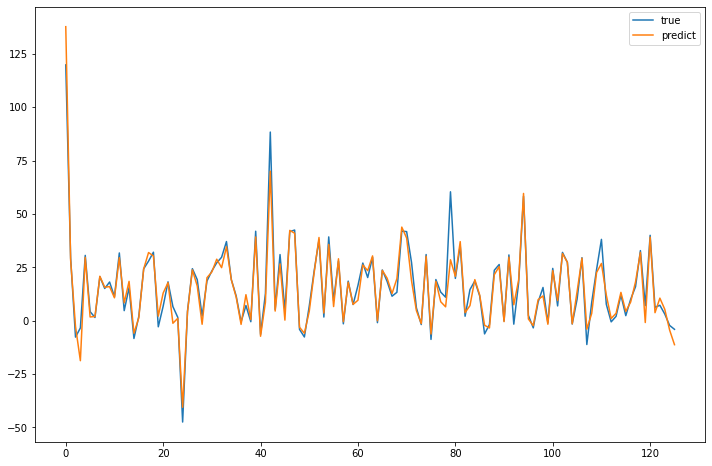

In [133]:
plots = pd.DataFrame(lin_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

<AxesSubplot:>

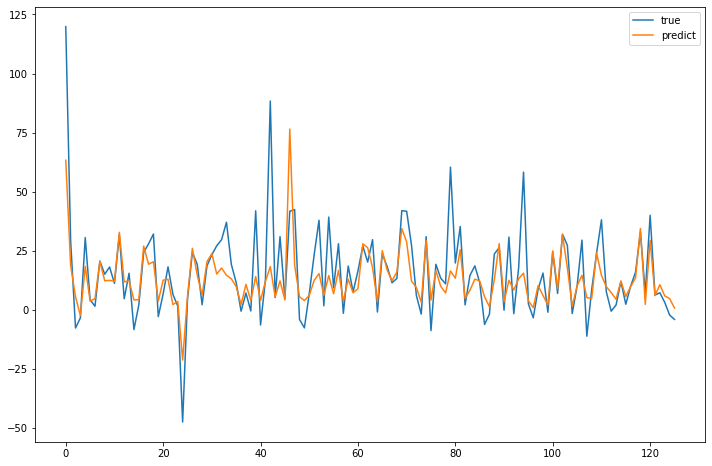

In [134]:
plots = pd.DataFrame(poly_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

<AxesSubplot:>

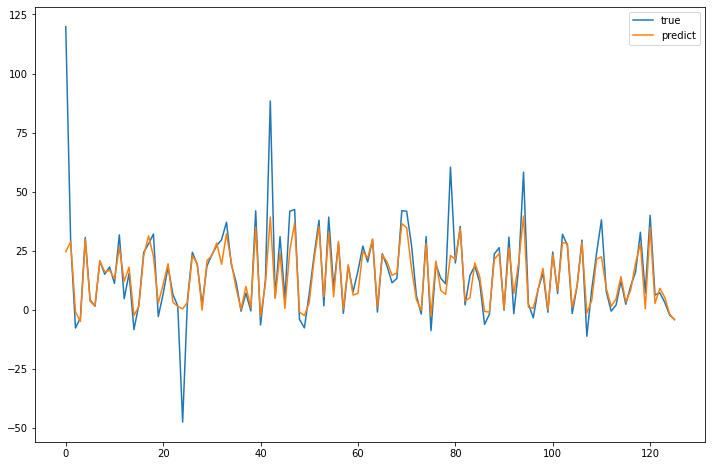

In [135]:
plots = pd.DataFrame(rbf_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [136]:
from sklearn.neural_network import MLPClassifier
ANN=MLPClassifier()
ANN.fit(x_train,y_train.astype('int'))
ANN_pred=ANN.predict(x_test)

print('Mean Absolute Error of ANN_model:', metrics.mean_absolute_error(y_test, ANN_pred))
print('Mean Squared Error of ANN_model:', metrics.mean_squared_error(y_test, ANN_pred))
print('Root Mean Squared Error of ANN_model:',np.sqrt(metrics.mean_squared_error(y_test, ANN_pred)))
print("R^2 Score of ANN model：",r2_score(y_test,ANN_pred))

Mean Absolute Error of ANN_model: 4.375619047619049
Mean Squared Error of ANN_model: 52.107214746031744
Root Mean Squared Error of ANN_model: 7.218532728057118
R^2 Score of ANN model： 0.8622550662660996


<AxesSubplot:>

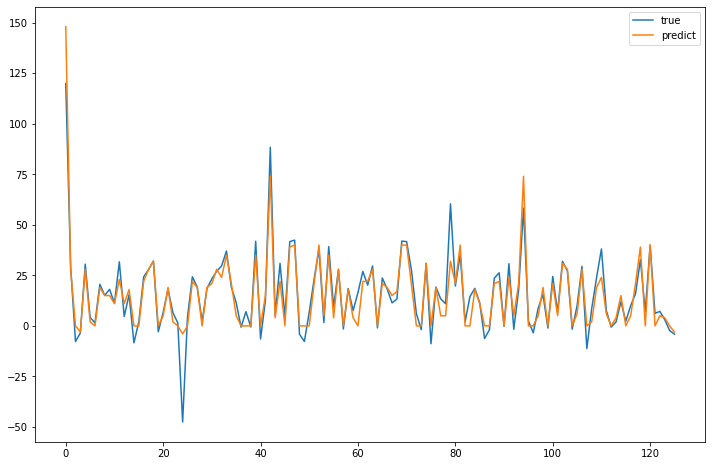

In [137]:
plots = pd.DataFrame(ANN_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))